In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Attributes

1) Primary Fuel    2) capacity_mw are output variables & rest are input variables

# EDA of Dataset

In [3]:
df.shape

(908, 25)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Float & str type data is present in dataset

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
#To check null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Null values present in dataset

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [11]:
df.drop(["estimated_generation_gwh",'wepp_id','other_fuel1','other_fuel2'], axis=1, inplace=True)



In [12]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel3,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,NaN,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,NaN,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.drop(["other_fuel3",'generation_data_source','owner','gppd_idnr'], axis=1, inplace=True)

In [14]:
df

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,IND,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [16]:
#Statistical summary of Dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


Observation:
   1) mean value is more than 50th median in longitude,generation_gwh_2013,generation_gwh_2014, generation_gwh_2015,generation_gwh_2016 & generation_gwh_2017
2) There is a large difference in 75th median and max generation_gwh_2013,generation_gwh_2014, generation_gwh_2015,generation_gwh_2016 & generation_gwh_2017.
From above two observations outliers are present in these columns.

# Exploring the data variable

In [17]:
df.year_of_capacity_data.unique()

array([  nan, 2018.])

so dropping this column

In [18]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [19]:
df.name.unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [20]:
df.url.unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

these columns have no use in predicting results so we can drop them as well

In [21]:
df.drop(['name','url'],axis=1,inplace=True)

In [22]:
df

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,IND,India,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
905,IND,India,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
906,IND,India,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [23]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [24]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [25]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [26]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Now there is no null values present in dataset

<AxesSubplot:>

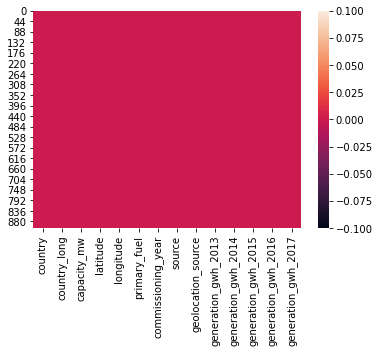

In [27]:
#to check missing values in data set via heat map # Data visualization
sns.heatmap(df.isnull())

Same color plot so no null value in the dataset

In [28]:
df['source'].nunique()

191

In [29]:
df['geolocation_source'].nunique()

3

In [30]:
df['country'].nunique()

1

In [31]:
df['country_long'].nunique()

1

country & country_long columns have no use in predicting results so we can drop them as well

In [32]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [35]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


# Data Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

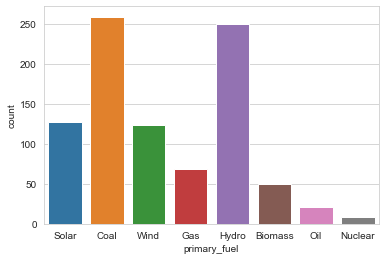

In [36]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

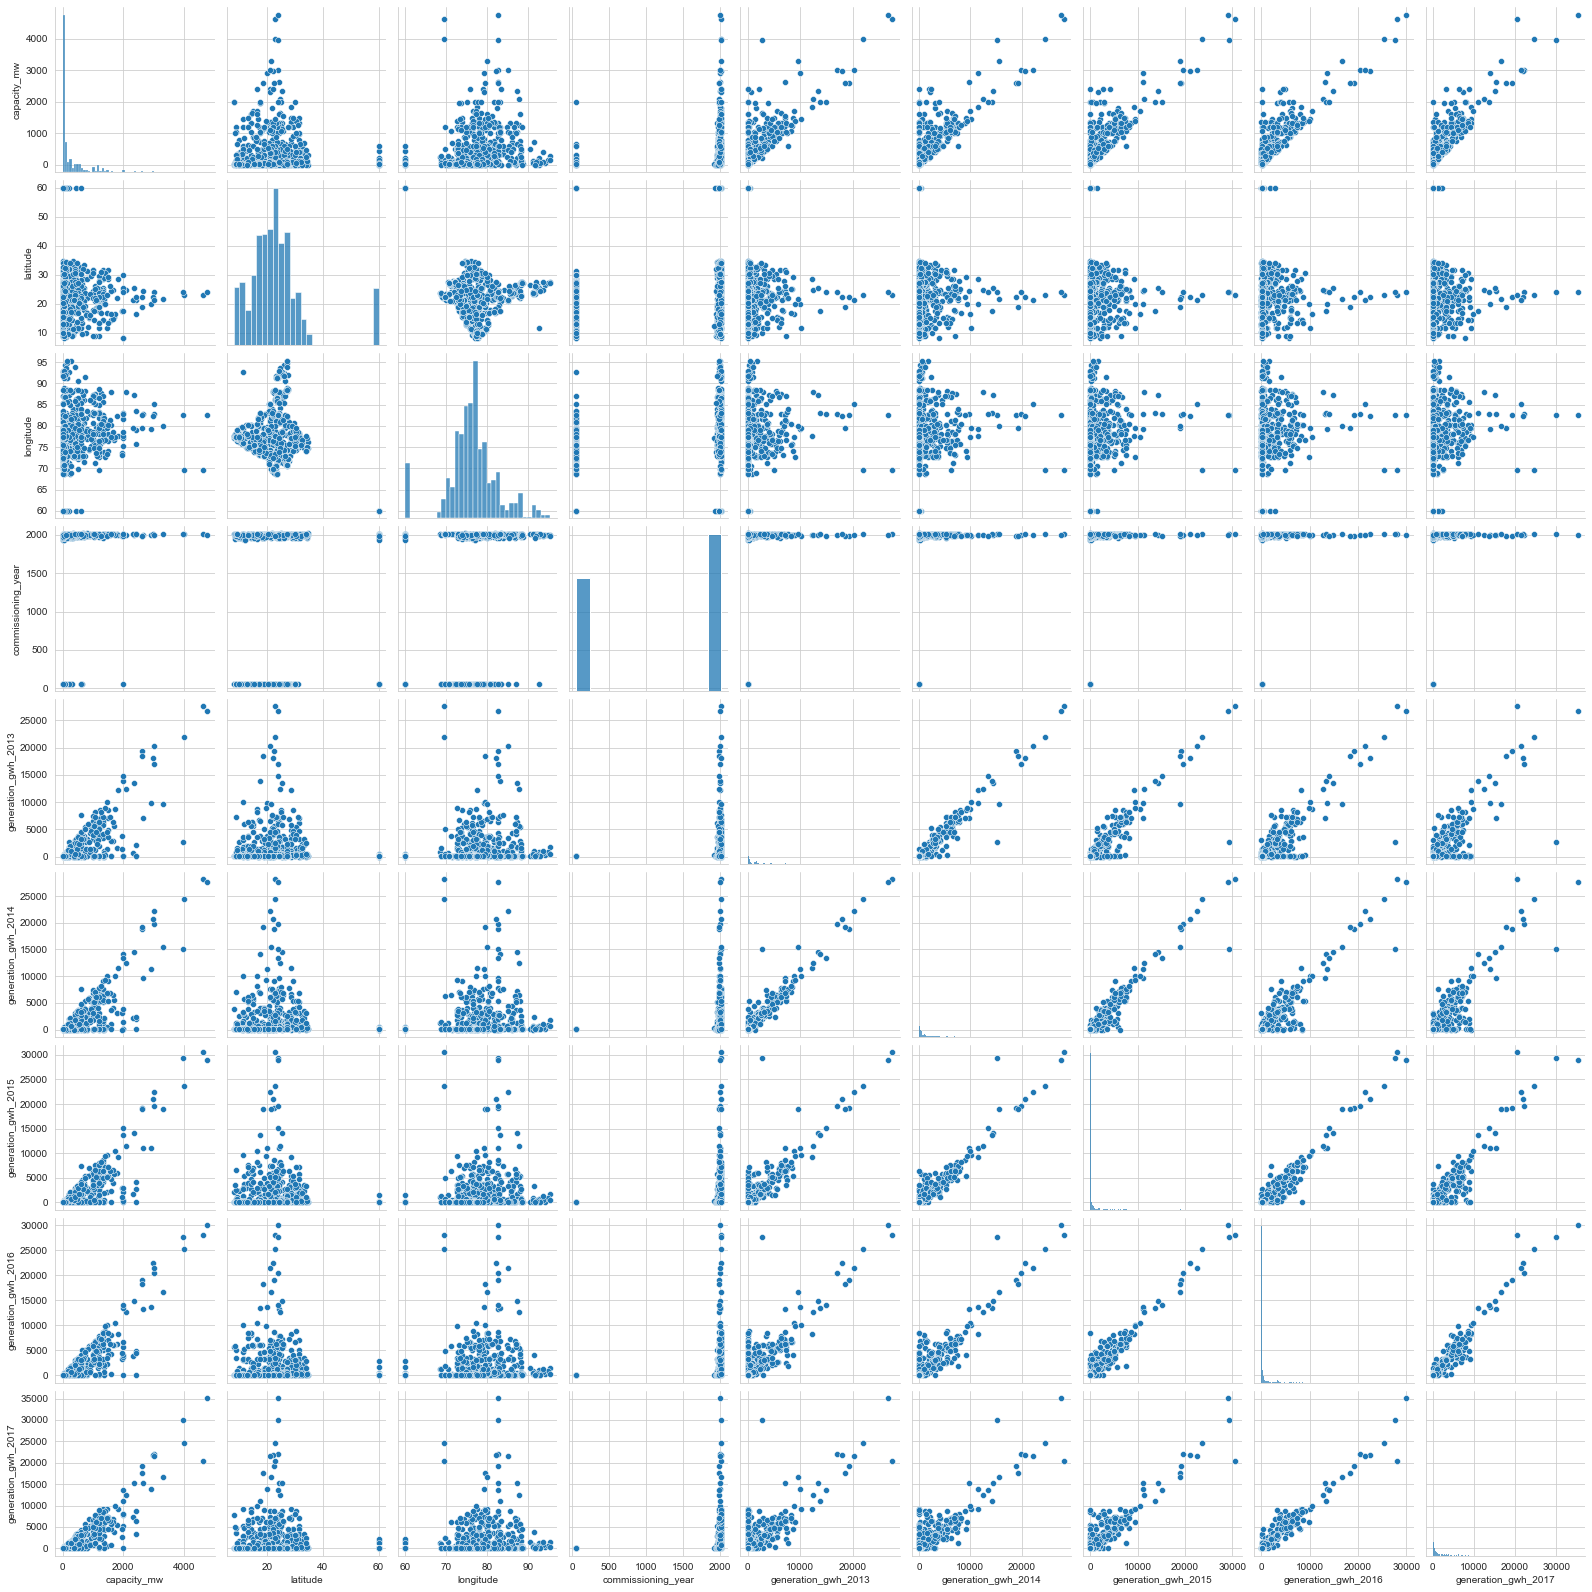

In [37]:
sns.pairplot(df)

# To check Correlations

In [38]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,-0.055235,0.218567,0.413675,0.775344,0.826067,0.851752,0.885536,0.901065
latitude,-0.055235,1.000000,-0.494141,0.087553,-0.029970,-0.029666,-0.030536,-0.031956,-0.025636
longitude,0.218567,-0.494141,1.000000,0.300270,0.156698,0.162828,0.172761,0.189201,0.202744
commissioning_year,0.413675,0.087553,0.300270,1.000000,0.298716,0.305196,0.304374,0.316101,0.325180
generation_gwh_2013,0.775344,-0.029970,0.156698,0.298716,1.000000,0.972775,0.911665,0.881082,0.843036
generation_gwh_2014,0.826067,-0.029666,0.162828,0.305196,0.972775,1.000000,0.966617,0.937817,0.907399
generation_gwh_2015,0.851752,-0.030536,0.172761,0.304374,0.911665,0.966617,1.000000,0.974645,0.943752
generation_gwh_2016,0.885536,-0.031956,0.189201,0.316101,0.881082,0.937817,0.974645,1.000000,0.976285
generation_gwh_2017,0.901065,-0.025636,0.202744,0.325180,0.843036,0.907399,0.943752,0.976285,1.000000


<AxesSubplot:>

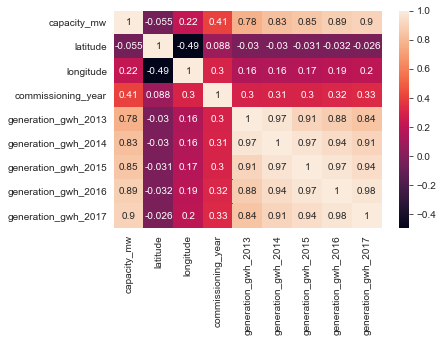

In [39]:
sns.heatmap(dfcor, annot=True)

Observation: generation_gwh_2013,2014,2015,2016 ,2017 respectively are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

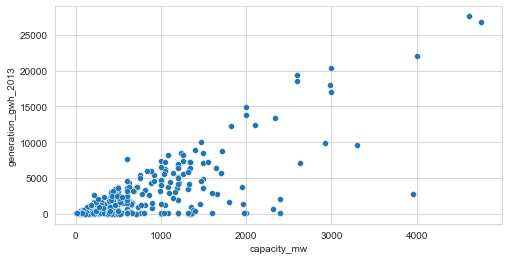

In [40]:
#Bi variate analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

generation is increasing capacity in 2013 (directly proportional)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

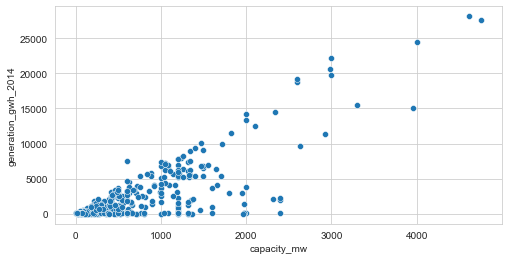

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

generation is increasing capacity in 2014 (directly proportional)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

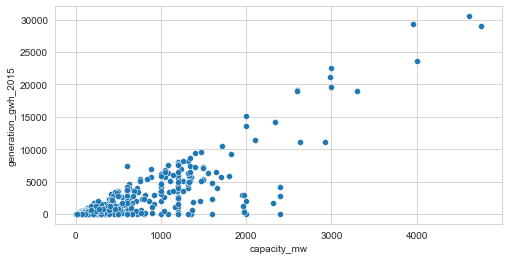

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

generation is increasing capacity in 2015 (directly proportional)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

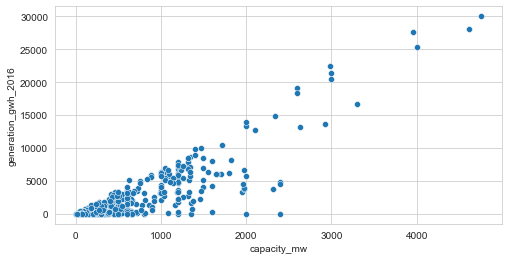

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

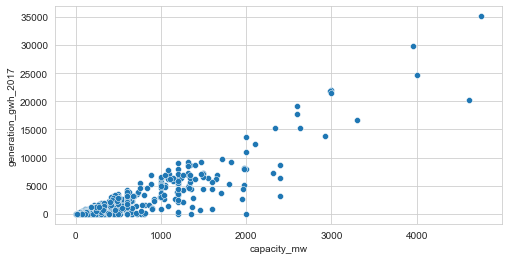

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

generation is increasing capacity in 2016 & 2017 (directly proportional)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

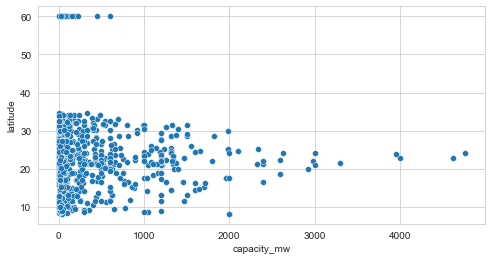

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

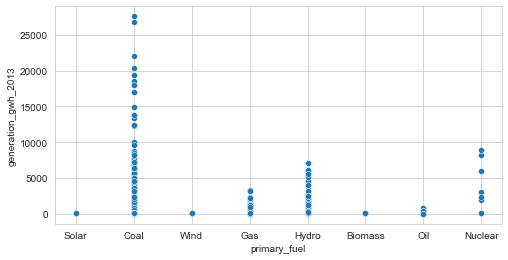

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

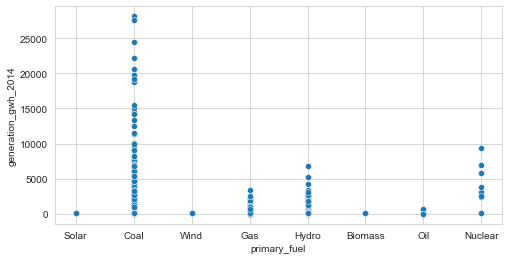

In [47]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

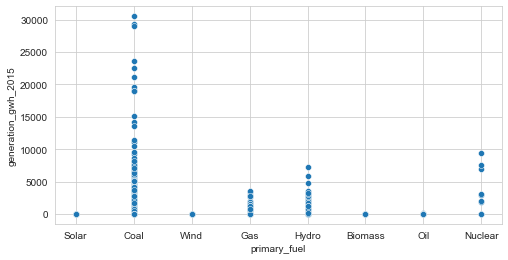

In [48]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

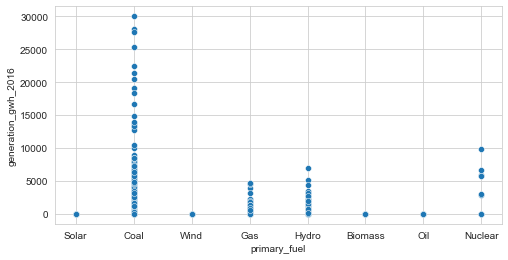

In [49]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

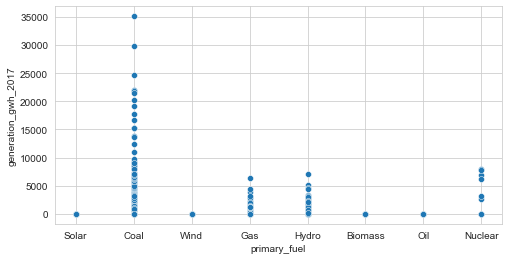

In [50]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

In all the years coal is most used fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

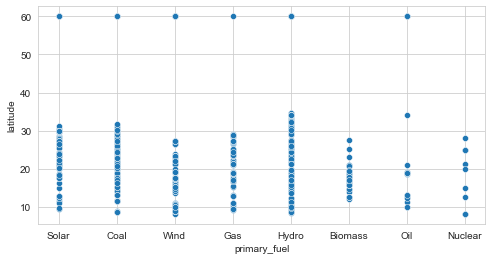

In [51]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

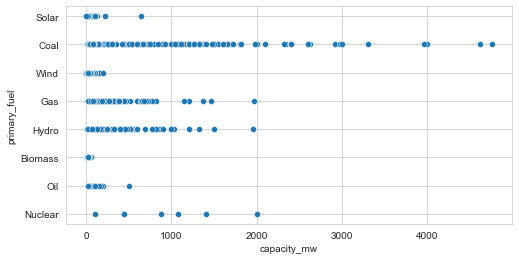

In [52]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
#converting categorical data to numerical data
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [55]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [56]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [57]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   geolocation_source   908 non-null    int32  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.6 KB


All data is float type

# Removing Ouliers

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [61]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [62]:
df.shape

(885, 12)

# Removing Skewness

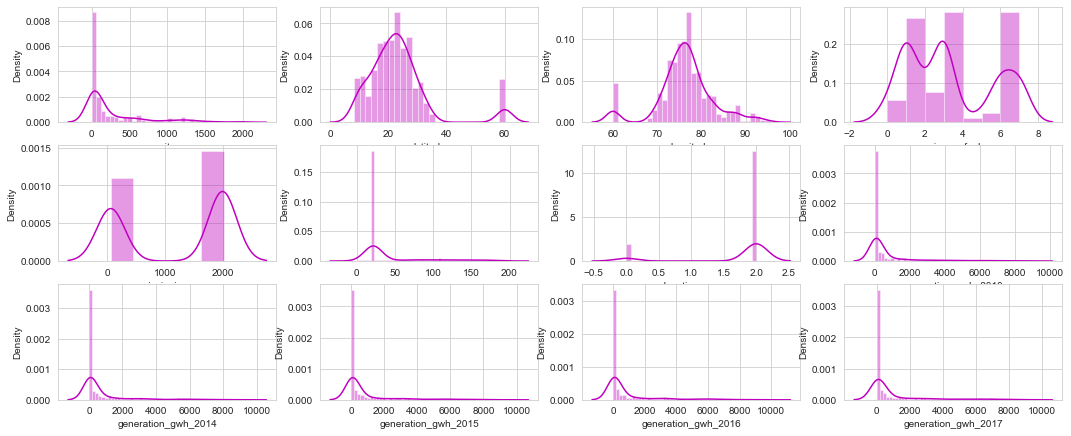

In [63]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='m')

In [64]:
df.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [67]:
df.skew()

capacity_mw            0.014952
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.034887
generation_gwh_2014   -0.014669
generation_gwh_2015   -0.012333
generation_gwh_2016   -0.009262
generation_gwh_2017   -0.005003
dtype: float64

In [68]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

For capacity_mw as target variable use linear regression model

In [69]:
#Dividing data into x and y
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [70]:
x.shape

(885, 11)

In [71]:
y.shape

(885,)

Scaling x values

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [75]:
pd.DataFrame(x).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [76]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.591291,0.568494,0.568932,0.566561,0.565028
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.183883,0.196731,0.200379,0.202994,0.210328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.710270,0.700391,0.703337,0.699987,0.703190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model fitting & testing

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [78]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6033793987661354
At random state 0, The test accuracy is: 0.6216727027615341


At random state 1, The training accuracy is: 0.6083279878933308
At random state 1, The test accuracy is: 0.6022223138115208


At random state 2, The training accuracy is: 0.6353782409904477
At random state 2, The test accuracy is: 0.4688289866613956


At random state 3, The training accuracy is: 0.6102288217663278
At random state 3, The test accuracy is: 0.5919635215348062


At random state 4, The training accuracy is: 0.6088027364078052
At random state 4, The test accuracy is: 0.5962173327956521


At random state 5, The training accuracy is: 0.620339909413044
At random state 5, The test accuracy is: 0.5423848089457906


At random state 6, The training accuracy is: 0.6179931752699392
At random state 6, The test accuracy is: 0.5442706774717503


At random state 7, The training accuracy is: 0.6162228512356386
At random state 7, The test accuracy is: 0.557057958233

random state=95 giving highest accuracy

In [79]:
#splitting the data into 73% training and 27% testing with random state=95
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [80]:
x_train.shape

(646, 11)

In [81]:
x_test.shape

(239, 11)

In [82]:
y_train.shape

(646,)

In [83]:
y_test.shape

(239,)

In [84]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5864596104267872


In [85]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3678555845581379
MAE: 0.4830078050551141
r2_score: 0.3663834258020633


In [86]:
from sklearn.linear_model import Ridge

In [87]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5863280068229355


In [88]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3674881298516646
MAE: 0.48409629349125477
r2_score: 0.3588186337202316


In [89]:
from sklearn.svm import SVR

In [90]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5456748672496656


In [91]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.388339618765605
MAE: 0.4420249811706922
r2_score: 0.46796252167348196


In [92]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7829703605552666


In [93]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.2134273177686561
MAE: 0.3334210320565575
r2_score: 0.7483369252856322


In [94]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7823377630968558


In [95]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.18917291582207238
MAE: 0.32387415459480867
r2_score: 0.7479458546128985


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [97]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9906753612727366


In [98]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.29845005755229154
MAE: 0.40103422585867776
r2_score: 0.6898968249958441


In [99]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8802104166754463


In [100]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.15079745889341772
MAE: 0.2972452909152468
r2_score: 0.8098468808878301


In [101]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.405445, 0.062499
R    : 0.404019, 0.062006
svr    : 0.446508, 0.076537
svr_p    : 0.249986, 0.053431
svr_r    : 0.231048, 0.063926
RF    : 0.210123, 0.060015
DTR    : 0.323198, 0.093622
GBR    : 0.204018, 0.063639


r2 score of GradientBoostingRegressor is highest so take it for hyper parameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [120]:
from sklearn import svm, datasets

In [130]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10,None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8,9, 10, 11, 12, 13, 15]}

In [131]:
rfr = RandomForestRegressor(random_state = 1)

In [132]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0,return_train_score=True)

In [133]:
g_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [134]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}


In [142]:
print(g_search.score(x_test, y_test))

0.8572288998004074


Best model

In [148]:
#Saving the model
import joblib

In [149]:
joblib.dump(g_search.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL

In [150]:
#Dividing data into x and y
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [151]:
x.shape

(885, 11)

In [152]:
y.shape

(885,)

In [153]:
#Spliting Train and Test data
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [155]:
x_train.shape

(646, 11)

In [156]:
x_test.shape

(239, 11)

In [157]:
y_train.shape

(646,)

In [158]:
y_test.shape

(239,)

In [161]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [162]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.5378531073446328


In [163]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5564853556485355
[[ 0  1  0  0  0  0 10  1]
 [ 0  8  0 39  0  0 17  4]
 [ 0  2  0 14  0  0  2  1]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  2  0  0  0  0 25  3]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.12      0.19        68
           2       0.00      0.00      0.00        19
           3       0.53      0.96      0.68        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.44      0.83      0.57        30
           7       0.80      1.00      0.89        35

    accuracy                           0.56       239
   macro avg       0.28      0.36      0.29       239
weighted avg       0.47      0.56      0.45       239

Training accuracy:: 0.5340557275541795
Test accuracy:: 0.5564853556485355


In [164]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7864406779661016


In [165]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.799163179916318
[[11  1  0  0  0  0  0  0]
 [ 5 47  6  8  0  2  0  0]
 [ 0  3 11  4  0  1  0  0]
 [ 0  8  4 55  0  1  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.76      0.69      0.72        68
           2       0.50      0.58      0.54        19
           3       0.82      0.81      0.81        68
           4       0.00      0.00      0.00         2
           5       0.38      0.60      0.46         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.80       239
   macro avg       0.64      0.70      0.66       239
weighted avg       0.80      0.80      0.80       239

Training accuracy:: 1.0
Test accuracy:: 0.799163179916318


In [166]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7299435028248588


In [167]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7364016736401674
[[ 8  2  1  0  0  0  1  0]
 [ 2 43  5 12  0  0  5  1]
 [ 1  8  5  4  0  0  0  1]
 [ 0  1  1 64  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  0  2  0  0  1  0]
 [ 5  3  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.74      0.63      0.68        68
           2       0.38      0.26      0.31        19
           3       0.77      0.94      0.85        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.75      0.70      0.72        30
           7       0.92      1.00      0.96        35

    accuracy                           0.74       239
   macro avg       0.50      0.53      0.51       239
weighted avg       0.71      0.74      0.72       239

Training accuracy:: 0.8142414860681114
Test accuracy:: 0.7364016736401674


In [168]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8542372881355933


In [169]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8451882845188284
[[11  1  0  0  0  0  0  0]
 [ 6 51  0  9  0  2  0  0]
 [ 0  4  7  6  0  2  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.84      0.75      0.79        68
           2       0.88      0.37      0.52        19
           3       0.80      0.96      0.87        68
           4       0.00      0.00      0.00         2
           5       0.43      0.60      0.50         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.70      0.70      0.68       239
weighted avg       0.85      0.85      0.83       239

Training accuracy:: 1.0
Test accuracy:: 0.8451882845188284


In [170]:
#ENSEMBLE TECHNIQUES

adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5458503575076609


In [171]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.41841004184100417
[[ 0  0  0 12  0  0  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 29  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.04      0.06        68
           2       0.00      0.00      0.00        19
           3       0.40      1.00      0.57        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.42       239
   macro avg       0.18      0.25      0.20       239
weighted avg       0.26      0.42      0.30       239

Training accuracy:: 0.44272445820433437
Test accuracy:: 0.41841004184100417


In [172]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8349846782431053


In [173]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8493723849372385
[[11  1  0  0  0  0  0  0]
 [ 6 52  3  6  0  1  0  0]
 [ 0  3  8  7  0  1  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.85      0.76      0.81        68
           2       0.62      0.42      0.50        19
           3       0.83      0.96      0.89        68
           4       0.00      0.00      0.00         2
           5       0.40      0.40      0.40         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.67      0.68      0.67       239
weighted avg       0.84      0.85      0.84       239

Training accuracy:: 0.9829721362229102
Test accuracy:: 0.8493723849372385


In [174]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8530771195097037


In [175]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8368200836820083
[[12  0  0  0  0  0  0  0]
 [ 5 51  2  7  2  1  0  0]
 [ 0  5  9  3  0  2  0  0]
 [ 0  5  1 62  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.81      0.75      0.78        68
           2       0.60      0.47      0.53        19
           3       0.86      0.91      0.89        68
           4       0.00      0.00      0.00         2
           5       0.20      0.20      0.20         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.84       239
   macro avg       0.65      0.67      0.65       239
weighted avg       0.83      0.84      0.83       239

Training accuracy:: 1.0
Test accuracy:: 0.8368200836820083


RandomForestClassifier as final model for HYPER PARAMETER TUNING

In [176]:
#HYPER PARAMETER TUNING
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [177]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=1,verbose=2,return_train_score=True)

In [178]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.7s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_sta

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   18.6s finished


Accuracy after parameter tuning:: 0.8284518828451883


In [180]:
#Report of RandomForestClassifier
print("CLASSIFICATION REPORT::\n",classification_report(y_test,rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.84      0.75      0.79        68
           2       0.80      0.21      0.33        19
           3       0.78      0.96      0.86        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.66      0.65      0.63       239
weighted avg       0.83      0.83      0.81       239



<AxesSubplot:>

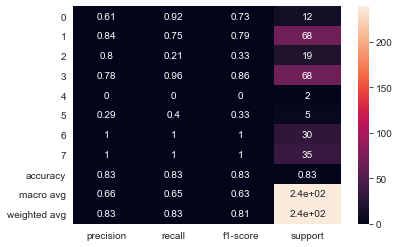

In [181]:
clsf_repo = classification_report(y_test,rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [182]:
from sklearn.metrics import roc_auc_score

In [184]:
y_prob = rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=200, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=200, random_state=10, total=   0.8s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_state=10 
[CV]  criterion=gini, min_samples_split=2, n_estimators=50, random_state=10, total=   0.2s
[CV] criterion=gini, min_samples_split=2, n_estimators=50, random_sta

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   17.9s finished


One-vs-One ROC AUC scores:
0.936745 (macro),
0.950466 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.951641 (macro),
0.971094 (weighted by prevalence)


# Saving Model

In [185]:
import joblib

In [186]:
joblib.dump(rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']